<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Code-/blob/main/Zerobase/04_Self_Oil_Station_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Self Oitl Station Prcie Analysis 

## 1. 셀레니움 설치
- 윈도우, mac(intel) 
    - conda install selenium 
- mac(m1) 
    - pip install selenium 
    
- chromedriver
    - 크롬 버전 확인
    - https://chromedriver.chromium.org/downloads

In [1]:
!pip install selenium 

     |████████████████████████████████| 904 kB 5.2 MB/s 


In [2]:
!pip list | grep sele

selenium                      3.141.0


In [3]:
!apt-get update
!apt install chromium-chromedriver

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,365 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packa

In [4]:
from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time

In [5]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait   # 해당 태그를 기다림
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException    # 태그가 없는 예외 처리

In [6]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인 
- 목표 데이터 
    - 브랜드 
    - 가격 
    - 셀프 주유 여부 
    - 위치 

## 3. 셀레니움으로 접근

In [7]:
from selenium import webdriver

In [40]:
# 페이지 접근 
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until


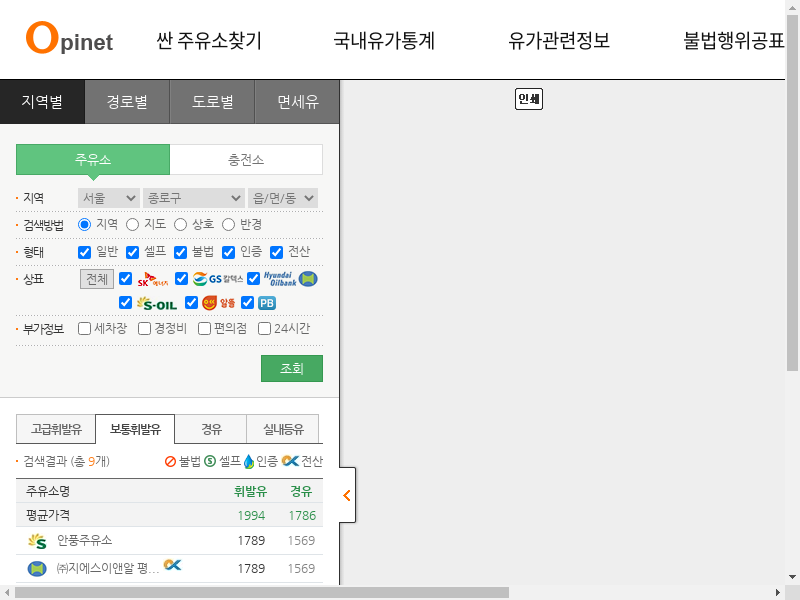

In [42]:
# 접근 페이지 이미지 출력
from IPython.display import Image

driver.get(url)
driver.save_screenshot('ss.png')
screenshot = Image('ss.png')
screenshot

In [43]:
time.sleep(3)

- 문제 
    - 1. 해당 URL로 한 번에 접근이 안됩니다. 
    - 2. 메인페이지로 접속이 되고, 팝업창이 하나 나옵니다.

In [ ]:
# # 팝업창 화면 전환 후 닫아주기 
# driver.switch_to_window(driver.window_handles[-1]) # 팝업창 비활성화를 하기 위해 팝업창을 활성화함.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use driver.switch_to.window instead
  


In [ ]:
# driver.close() # 팝업창만 닫아짐

In [37]:
import time 

def main_get():
    # 페이지 접근 
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
    driver.get(url)
    time.sleep(3)
    # 팝업창으로 전환 
    driver.switch_to_window(driver.window_handles[-1])
    # 팝업창 닫아주기
    driver.close()
    time.sleep(3)
    # 메인화면 창으로 전환 
    driver.switch_to_window(driver.window_handles[-1])
    # 접근 URL 다시 요청 
    driver.get(url)

In [34]:
# main_get()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


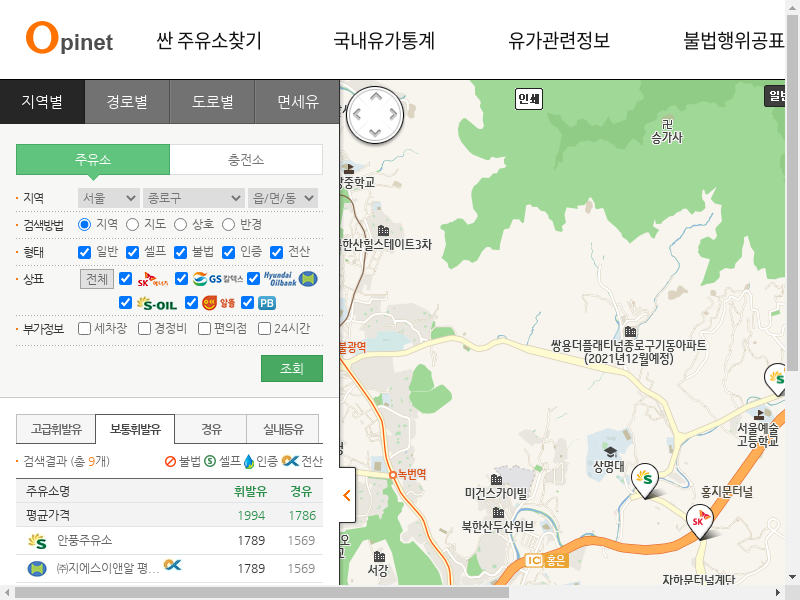

In [44]:
# 3초 타임슬립 이후 출력창
driver.save_screenshot('ss1.png')
screenshot = Image('ss1.png')
screenshot

In [45]:
# 지역: 시/도 

sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw.text

'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [46]:
sido_list = sido_list_raw.find_elements_by_tag_name("option")
len(sido_list), sido_list[17].text

(18, '제주')

In [ ]:
sido_list[1].get_attribute("value")

'서울특별시'

In [ ]:
# 1. 
sido_names = [] 

for option in sido_list:
    sido_names.append(option.get_attribute("value"))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [64]:
# 2. 
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names[:5] # 맨 앞에 빈 칸이 있음

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [65]:
sido_names = sido_names[1:] # 처음 빈칸은 제외시키고 가져오기
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [ ]:
sido_names[0]

'서울특별시'

In [ ]:
sido_list_raw.send_keys(sido_names[0])

In [ ]:
# 구 

gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0") # 부모 태그 
gu_list = gu_list_raw.find_elements_by_tag_name("option") # 자식 태그 

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [ ]:
gu_list_raw.send_keys(gu_names[15])

In [ ]:
# 엑셀 저장 

driver.find_element_by_css_selector("#glopopd_excel").click()

In [ ]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [ ]:
element_get_excel = driver.find_element_by_id("glopopd_excel")
element_get_excel.click()

In [ ]:
import time 
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element_by_id("glopopd_excel").click()
    time.sleep(3)

/var/folders/8c/jb57288j6xlb3s_tkmys1kj00000gn/T/ipykernel_7183/2345753629.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
driver.close() 

## 4. 데이터 정리하기 

In [ ]:
import pandas as pd 
from glob import glob 

In [ ]:
# !pip install glob

In [ ]:
# 파일 목록 한 번에 가져오기 
glob("../data/지역_*.xls")

['../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (11).xls']

In [ ]:
# 파일명 저장 
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (4).xls']

In [ ]:
# 하나만 읽어보기 
tmp = pd.read_excel(stations_files[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
16,서울특별시,현대오일뱅크㈜직영 영신주유소,서울 도봉구 방학로 151,현대오일뱅크,02-956-5152,N,1898,1698,1498,1049
17,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-2266-1448,Y,-,-,-,-


In [ ]:
tmp_raw = [] 

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat 

In [ ]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1608,1408,1100
1,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1608,1408,990
2,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1609,1409,-
3,서울특별시,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1613,1413,-
4,서울특별시,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,1877,1613,1413,1000
...,...,...,...,...,...,...,...,...,...,...
5,서울특별시,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),현대오일뱅크,02-815-0724,Y,1859,1693,1493,-
6,서울특별시,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,GS칼텍스,02-815-2354,N,-,1699,1489,1150
7,서울특별시,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),GS칼텍스,02-532-0606,Y,-,1699,1499,-
8,서울특별시,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),현대오일뱅크,02-817-9179,N,1869,1714,1514,-


In [ ]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [ ]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [ ]:
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"], 
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"]
})
stations.tail()

,상호,주소,가격,셀프,상표
5,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1693,Y,현대오일뱅크
6,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1699,N,GS칼텍스
7,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1699,Y,GS칼텍스
8,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1714,N,현대오일뱅크
9,살피재주유소,서울 동작구 상도로 334,1785,N,SK에너지


In [ ]:
for eachAddress in stations["주소"]:
    print(eachAddress.split()[1])

도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
종로구
종로구
종로구
종로구
종로구
종로구
종로구
종로구
종로구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영

In [ ]:
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations

,상호,주소,가격,셀프,상표,구
0,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1608,Y,SK에너지,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1608,N,현대오일뱅크,도봉구
2,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1609,Y,S-OIL,도봉구
3,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1613,N,현대오일뱅크,도봉구
4,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1613,Y,S-OIL,도봉구
...,...,...,...,...,...,...
5,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1693,Y,현대오일뱅크,동작구
6,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1699,N,GS칼텍스,동작구
7,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1699,Y,GS칼텍스,동작구
8,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1714,N,현대오일뱅크,동작구


In [ ]:
stations["구"].unique(), len(stations["구"].unique())

(array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
        '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
        '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object),
 25)

In [ ]:
# stations[stations["구"] == "서울특별시"]
# stations.loc[stations["구"] == "서울특별시", "구"] = "성동구"
# stations[stations["구"] == "특별시"]
# stations.loc[stations["구"] == "특별시", "구"] = "도봉구"

In [ ]:
# 가격 데이터형 변환 object => float 

stations["가격"] = stations["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [ ]:
# 가격 정보 없는 주유소 
stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
17,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),-,Y,현대오일뱅크,도봉구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
31,현대오일뱅크㈜직영 올림픽셀프주유소,서울 송파구 위례성대로 188 (오금동),-,Y,현대오일뱅크,송파구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
36,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [ ]:
# 가격 정보가 있는 주유소만 사용 
stations = stations[stations["가격"] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
5,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1693,Y,현대오일뱅크,동작구
6,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1699,N,GS칼텍스,동작구
7,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1699,Y,GS칼텍스,동작구
8,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1714,N,현대오일뱅크,동작구
9,살피재주유소,서울 동작구 상도로 334,1785,N,SK에너지,동작구


In [ ]:
stations["가격"] = stations["가격"].astype("float")

/var/folders/8c/jb57288j6xlb3s_tkmys1kj00000gn/T/ipykernel_7183/3747494062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype("float")


In [ ]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      468 non-null    object 
 1   주소      468 non-null    object 
 2   가격      468 non-null    float64
 3   셀프      468 non-null    object 
 4   상표      468 non-null    object 
 5   구       468 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.6+ KB


In [ ]:
stations

,상호,주소,가격,셀프,상표,구
0,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1608.0,Y,SK에너지,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1608.0,N,현대오일뱅크,도봉구
2,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1609.0,Y,S-OIL,도봉구
3,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1613.0,N,현대오일뱅크,도봉구
4,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1613.0,Y,S-OIL,도봉구
...,...,...,...,...,...,...
5,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1693.0,Y,현대오일뱅크,동작구
6,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1699.0,N,GS칼텍스,동작구
7,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1699.0,Y,GS칼텍스,동작구
8,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1714.0,N,현대오일뱅크,동작구


In [ ]:
# 인덱스 재정렬 
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
463,5,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1693.0,Y,현대오일뱅크,동작구
464,6,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1699.0,N,GS칼텍스,동작구
465,7,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1699.0,Y,GS칼텍스,동작구
466,8,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1714.0,N,현대오일뱅크,동작구
467,9,살피재주유소,서울 동작구 상도로 334,1785.0,N,SK에너지,동작구


In [ ]:
stations.head()

,index,상호,주소,가격,셀프,상표,구
0,0,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1608.0,Y,SK에너지,도봉구
1,1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1608.0,N,현대오일뱅크,도봉구
2,2,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1609.0,Y,S-OIL,도봉구
3,3,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1613.0,N,현대오일뱅크,도봉구
4,4,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1613.0,Y,S-OIL,도봉구


In [ ]:
del stations["index"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1608.0,Y,SK에너지,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1608.0,N,현대오일뱅크,도봉구
2,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1609.0,Y,S-OIL,도봉구
3,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1613.0,N,현대오일뱅크,도봉구
4,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1613.0,Y,S-OIL,도봉구


In [ ]:
stations.tail()

,상호,주소,가격,셀프,상표,구
463,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1693.0,Y,현대오일뱅크,동작구
464,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1699.0,N,GS칼텍스,동작구
465,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1699.0,Y,GS칼텍스,동작구
466,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1714.0,N,현대오일뱅크,동작구
467,살피재주유소,서울 동작구 상도로 334,1785.0,N,SK에너지,동작구


## 5. 주유 가격 정보 시각화

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import platform
from matplotlib import font_manager, rc 

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system == "Windows":
    font_name = font_manager.Fontproperties(fname=path).get_name() 
    rc("font", family=font_name)
else:
    print("Unkown system. sorry~~")

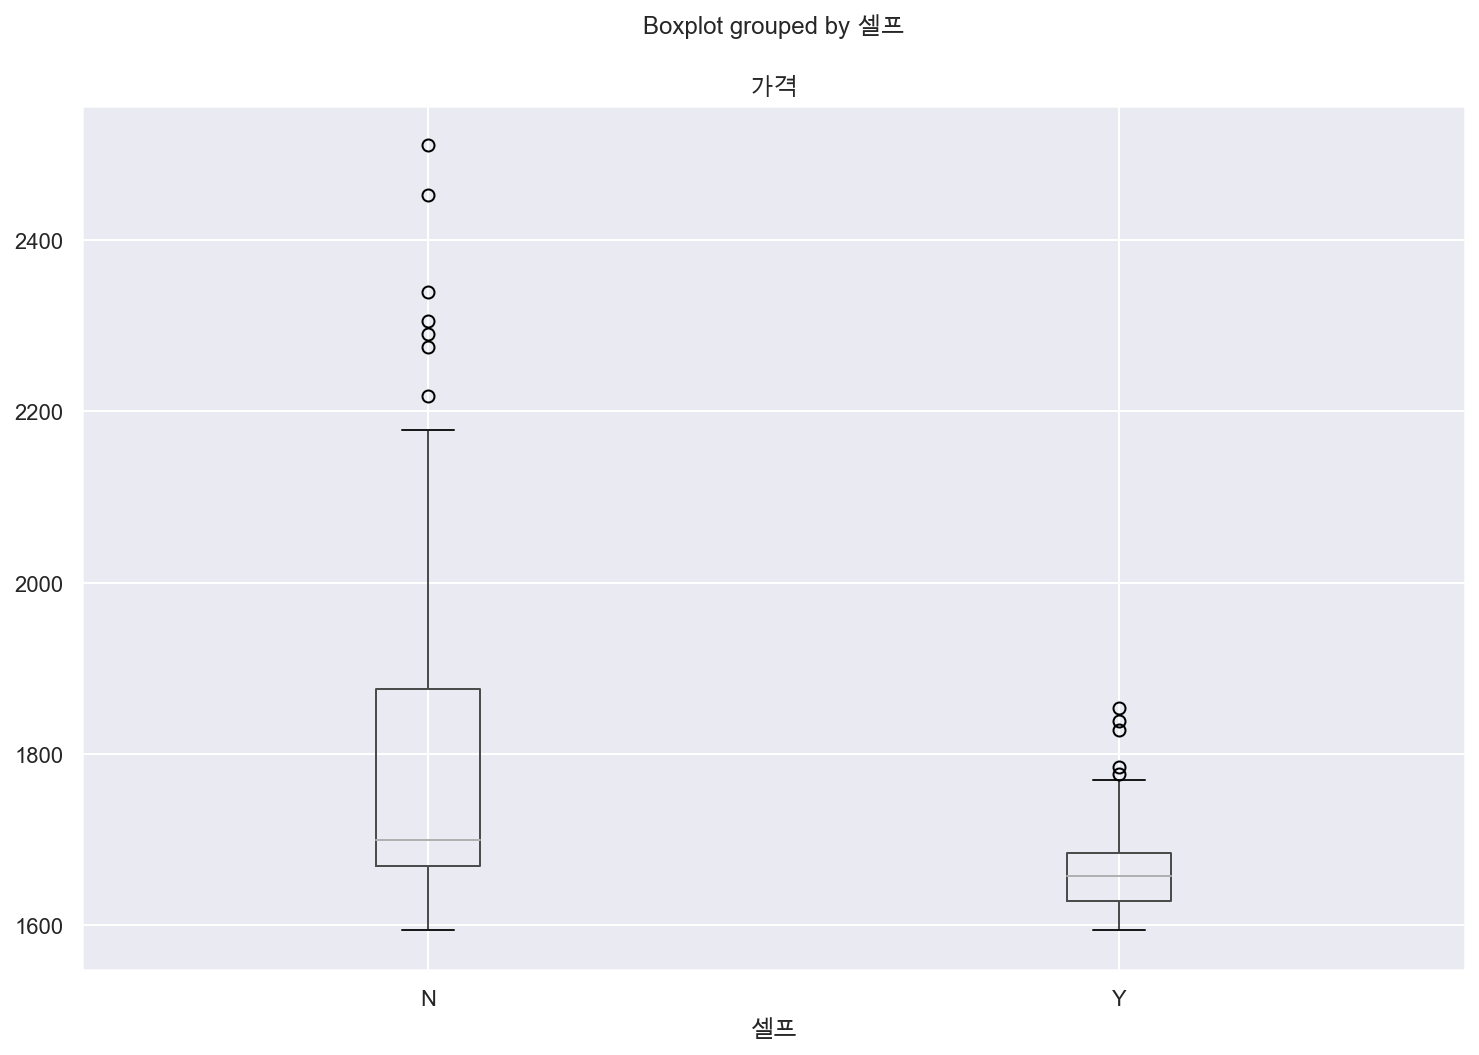

In [ ]:
# boxplot(feat. pandas)

stations.boxplot(column="가격", by="셀프", figsize=(12, 8));

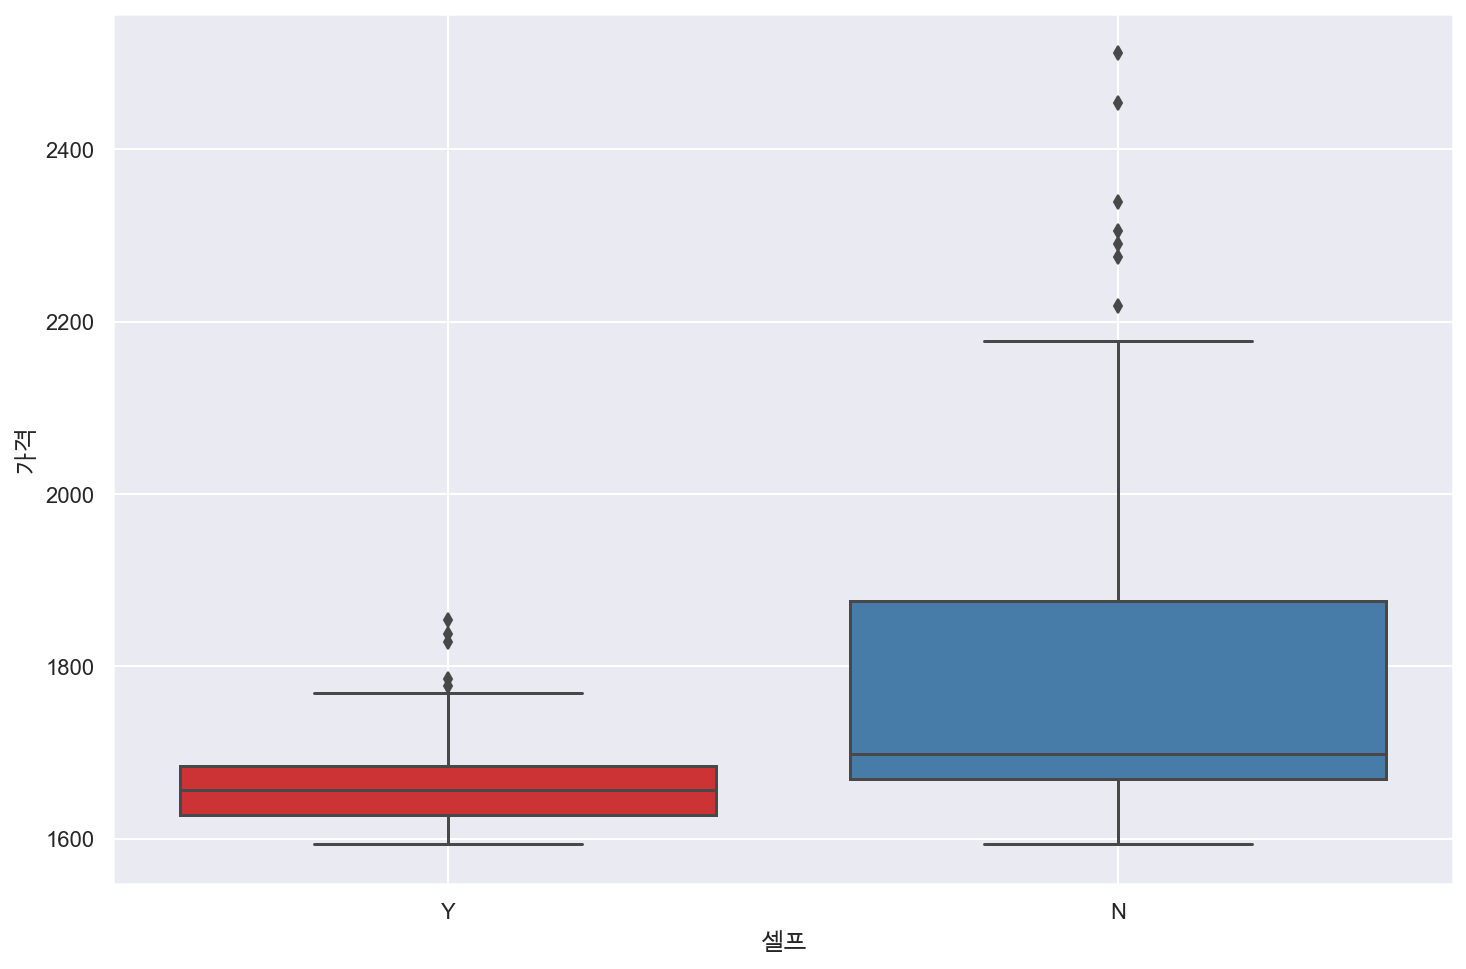

In [ ]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set1")
plt.grid(True)
plt.show()

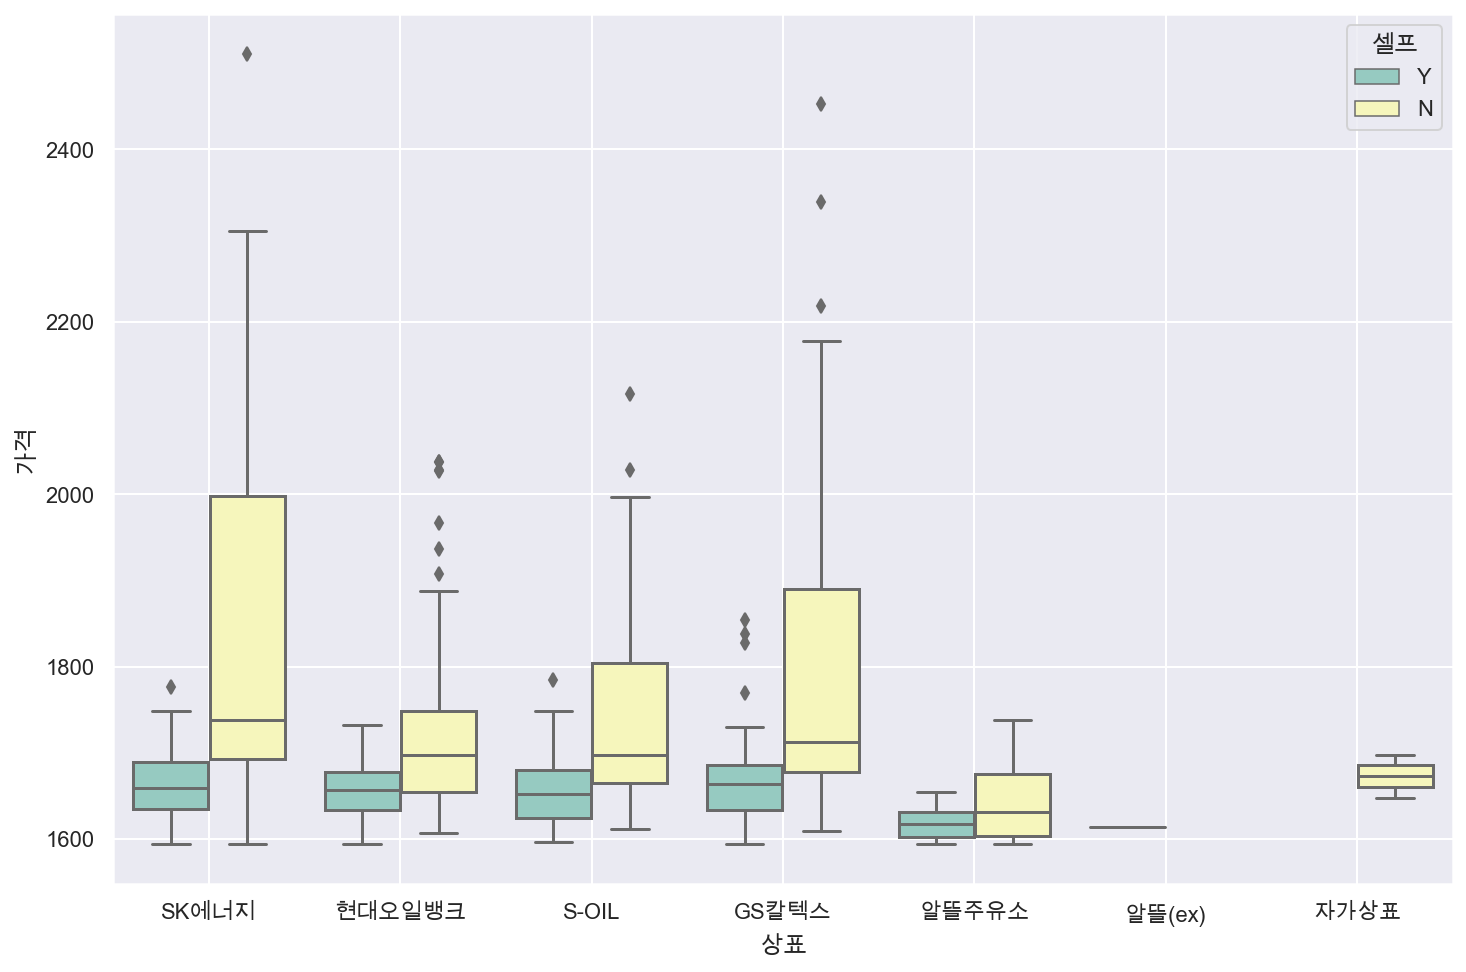

In [ ]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.show()

In [ ]:
# 지도 시각화 

In [ ]:
import json 
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
# 가장 비싼 주유소 10개 
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
229,서남주유소,서울 중구 통일로 30,2511.0,N,SK에너지,중구
282,서계주유소,서울 용산구 청파로 367 (서계동),2453.0,N,GS칼텍스,용산구
228,필동주유소,서울 중구 퇴계로 196 (필동2가),2339.0,N,GS칼텍스,중구
227,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2305.0,N,SK에너지,중구
281,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
424,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
226,약수주유소,서울 중구 다산로 173,2218.0,N,GS칼텍스,중구
166,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2178.0,N,GS칼텍스,종로구
280,에너비스,서울 용산구 한남대로 82 (한남동),2178.0,N,SK에너지,용산구
279,한남지점,서울 용산구 한남대로21길 4 (한남동),2178.0,N,SK에너지,용산구


In [ ]:
# 가장 값싼 주유소 10개 
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
102,화곡역주유소,서울 강서구 강서로 154 (화곡동),1594.0,Y,알뜰주유소,강서구
103,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1594.0,N,알뜰주유소,강서구
134,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1594.0,N,SK에너지,양천구
88,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1595.0,Y,GS칼텍스,노원구
370,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
89,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
135,현대주유소,서울 양천구 남부순환로 372 (신월동),1597.0,Y,S-OIL,양천구
230,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
232,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
233,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구


In [ ]:
import numpy as np 

gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1861.750000
강동구,1762.562500
강북구,1623.692308
강서구,1678.281250
관악구,1702.866667


In [ ]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map